![Alt text](image.png)

In [1]:
import tensorflow
import pandas as pd
import numpy as np
import joblib

In [2]:
scores_df = pd.read_csv('./scores.csv')
peliculas_df = pd.read_csv('./peliculas.csv')

In [3]:
scores_df

,Unnamed: 0,user_id,movie_id,rating,Date
0,0,196,242,3,1997-12-04 15:55:49
1,1,186,302,3,1998-04-04 19:22:22
2,2,22,377,1,1997-11-07 07:18:36
3,3,244,51,2,1997-11-27 05:02:03
4,4,166,346,1,1998-02-02 05:33:16
...,...,...,...,...,...
99995,99995,880,476,3,1997-11-22 05:10:44
99996,99996,716,204,5,1997-11-17 19:39:03
99997,99997,276,1090,1,1997-09-20 22:49:55
99998,99998,13,225,2,1997-12-17 22:52:36


In [4]:
peliculas_df

,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
score_peli_df = scores_df.merge(peliculas_df,how='left',right_on='id',left_on='movie_id')
score_peli_df

,Unnamed: 0,user_id,movie_id,rating,Date,id,Name,Release Date,IMDB URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,196,242,3,1997-12-04 15:55:49,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,1,186,302,3,1998-04-04 19:22:22,302,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,...,0,1,0,0,1,0,0,1,0,0
2,2,22,377,1,1997-11-07 07:18:36,377,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,...,0,0,0,0,0,0,0,0,0,0
3,3,244,51,2,1997-11-27 05:02:03,51,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,...,0,0,0,0,0,1,0,0,1,1
4,4,166,346,1,1998-02-02 05:33:16,346,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,880,476,3,1997-11-22 05:10:44,476,"First Wives Club, The (1996)",14-Sep-1996,http://us.imdb.com/M/title-exact?First%20Wives...,0,...,0,0,0,0,0,0,0,0,0,0
99996,99996,716,204,5,1997-11-17 19:39:03,204,Back to the Future (1985),01-Jan-1985,http://us.imdb.com/M/title-exact?Back%20to%20t...,0,...,0,0,0,0,0,0,1,0,0,0
99997,99997,276,1090,1,1997-09-20 22:49:55,1090,Sliver (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,...,0,0,0,0,0,0,0,1,0,0
99998,99998,13,225,2,1997-12-17 22:52:36,225,101 Dalmatians (1996),27-Nov-1996,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dict_pelis = {}
for n,i in enumerate(score_peli_df.movie_id.unique()):
    dict_pelis.update({i:n+1})
dict_users = {}
for n,i in enumerate(score_peli_df.user_id.unique()):
    dict_users.update({i:n+1})

In [7]:
joblib.dump(dict_pelis,'dict_pelis')

['dict_pelis']

In [8]:
joblib.dump(dict_users,'dict_users')

['dict_users']

In [8]:
score_peli_df['movie_id'] = score_peli_df['movie_id'].map(dict_pelis)

In [9]:
score_peli_df['user_id'] = score_peli_df['user_id'].map(dict_users)

# MODELO BASE

In [12]:
df_train = score_peli_df.iloc[0:80000]
df_validation = score_peli_df.iloc[80000:90000]
df_test = score_peli_df.iloc[90000:]
print(df_train.shape,df_validation.shape,df_test.shape)

(80000, 28) (10000, 28) (10000, 28)


In [13]:
# voy a predecir el rating que le da a la pelicula un usuario con el promedio de raiting de la pelicula
avg_score_movie = df_train.groupby('movie_id')['rating'].mean().reset_index()
avg_score_movie

,movie_id,rating
0,1,4.050505
1,2,4.144796
2,3,1.909091
3,4,3.420290
4,5,3.708738
...,...,...
1645,1646,1.000000
1646,1647,5.000000
1647,1648,5.000000
1648,1649,1.000000


In [14]:
y_train = df_train.rating
y_val = df_validation.rating
y_train_pred = df_train.merge(avg_score_movie,how='left',right_on='movie_id',left_on='movie_id')['rating_y']
y_val_pred = df_validation.merge(avg_score_movie,how='left',right_on='movie_id',left_on='movie_id')['rating_y']

In [15]:
y_val_pred = y_val_pred.fillna(y_train.mean())

In [16]:
from sklearn.metrics import mean_squared_error
print('Train error',np.sqrt(mean_squared_error(y_true=y_train,y_pred=y_train_pred)))
print('Val error',np.sqrt(mean_squared_error(y_true=y_val,y_pred=y_val_pred)))

Train error 0.9983949760175748
Val error 1.015913288459147


# RED NEURONAL 

In [10]:
movie_length = score_peli_df.movie_id.unique().shape[0]
user_length = score_peli_df.user_id.unique().shape[0]

In [11]:
from keras.layers import Embedding,Flatten,Dense,Lambda,Input,Concatenate,Dense
from keras import Model
from keras.regularizers import l2
from keras.optimizers import Adam, Adamax

In [12]:
import keras.backend as K 
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [13]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, monitor='val_root_mean_squared_error')
RLRonP = ReduceLROnPlateau(monitor='val_root_mean_squared_error',patience=4,factor=0.5)
early_s = EarlyStopping(monitor='val_root_mean_squared_error',patience=8)

In [14]:
#busqueda de hiperparametros
from hyperopt import hp,tpe,Trials,fmin,STATUS_OK
from sklearn.model_selection import train_test_split

def objective(params):
    movie_input = Input(shape=[1],name='movie_input')
    user_input = Input(shape=[1],name='user_input')
    gen_input = Input(shape=[19],name='gen')

    movie_embedding = Embedding(input_dim=movie_length+1,output_dim=params['embedding_units'],embeddings_regularizer=l2(params['learning_rate']),name='embmovie')(movie_input)
    user_embedding = Embedding(input_dim=user_length+1,output_dim=params['embedding_units'],embeddings_regularizer=l2(params['learning_rate']),name='embuser')(user_input)

    movie_flatten = Flatten(name='flatembmovie')(movie_embedding)
    user_flatten = Flatten(name='flatuser')(user_embedding)

    concat = Concatenate(name='concatenate')([movie_flatten,user_flatten,gen_input])

    dense = Dense(params['hidden_units'],activation='sigmoid',name='conextion')(concat)
    dense = Dense(params['hidden_units'],activation='sigmoid',name='conextion1')(dense)
    dense = Dense(params['hidden_units'],activation='sigmoid',name='conextion2')(dense)

    dense = Dense(1,activation='sigmoid',name='conextion3')(dense)

    output = Lambda(lambda z: (5 - 1) * z + 0)(dense)

    model = Model([user_input, movie_input, gen_input], output)

    model.compile(optimizer=Adamax(learning_rate=params['learning_rate']),loss='mean_squared_error',metrics=[root_mean_squared_error])
    model.fit([df_train.user_id, df_train.movie_id, df_train.iloc[:,9:]], 
                    df_train.rating, 
                    validation_data=([df_validation.user_id, df_validation.movie_id, df_validation.iloc[:,9:]], df_validation.rating), 
                    batch_size = params['batch_size'],
                    callbacks = [checkpointer,early_s,RLRonP],
                    epochs=100, verbose=2)
    rmspe_model = np.array(model.evaluate([df_validation.user_id, df_validation.movie_id, df_validation.iloc[:,9:]], df_validation.rating)[1])
    return {'loss':rmspe_model,'status':STATUS_OK,'model':model}
space = {'hidden_units':hp.choice('hidden_units',np.arange(5,200)),
         'learning_rate':hp.loguniform('learning_rate',-3,-1),
         'embedding_units':hp.choice('embedding_units',np.arange(5,200)),
         'batch_size':hp.choice('batch_size',np.arange(8,1500))}
tpe_trials =Trials()
best = fmin(space=space,fn=objective,trials=tpe_trials,verbose=1,algo=tpe.suggest,return_argmin=False,max_evals=20)

In [15]:
best = {'batch_size': 832,
 'embedding_units': 76,
 'hidden_units': 28,
 'learning_rate': 0.0847456317998756}

In [16]:
movie_input = Input(shape=[1],name='movie_input')
user_input = Input(shape=[1],name='user_input')
gen_input = Input(shape=[19],name='gen')
movie_embedding = Embedding(input_dim=movie_length+1,output_dim=best['embedding_units'],embeddings_regularizer=l2(best['learning_rate']),name='embmovie')(movie_input)
user_embedding = Embedding(input_dim=user_length+1,output_dim=best['embedding_units'],embeddings_regularizer=l2(best['learning_rate']),name='embuser')(user_input)
movie_flatten = Flatten(name='flatembmovie')(movie_embedding)
user_flatten = Flatten(name='flatuser')(user_embedding)
concat = Concatenate(name='concatenate')([movie_flatten,user_flatten,gen_input])
dense = Dense(best['hidden_units'],activation='sigmoid',name='conextion')(concat)
dense = Dense(best['hidden_units'],activation='sigmoid',name='conextion1')(dense)
dense = Dense(best['hidden_units'],activation='sigmoid',name='conextion2')(dense)
dense = Dense(1,activation='sigmoid',name='conextion3')(dense)
output = Lambda(lambda z: (5 - 1) * z + 0)(dense)
model = Model([user_input, movie_input, gen_input], output)
model.compile(optimizer=Adamax(learning_rate=best['learning_rate']),loss='mean_squared_error',metrics=[root_mean_squared_error])

In [ ]:
history = model.fit([df_train.user_id, df_train.movie_id, df_train.iloc[:,9:]], 
                df_train.rating, 
                validation_data=([df_validation.user_id, df_validation.movie_id, df_validation.iloc[:,9:]], df_validation.rating), 
                batch_size = best['batch_size'],
                callbacks = [checkpointer,early_s,RLRonP],
                epochs=100, verbose=2)

In [17]:
model.load_weights('weights.hdf5')

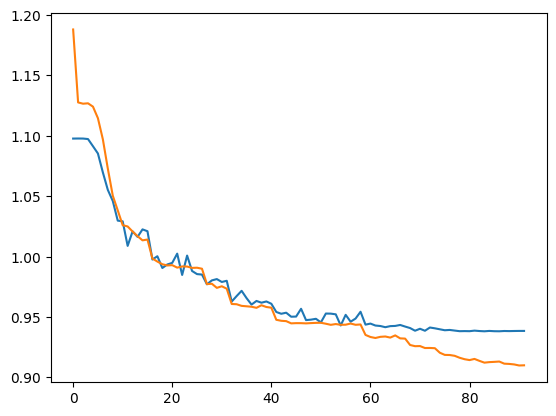

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_root_mean_squared_error'])
plt.plot(history.history['root_mean_squared_error'])

In [26]:
y_train_pred = model.predict([df_train.user_id, df_train.movie_id, df_train.iloc[:,9:]])
y_val_pred = model.predict([df_validation.user_id, df_validation.movie_id, df_validation.iloc[:,9:]])

print('Train error',np.sqrt(mean_squared_error(y_true=y_train,y_pred=y_train_pred)))
print('Val error',np.sqrt(mean_squared_error(y_true=y_val,y_pred=y_val_pred)))

313/313 [==============================] - 1s 2ms/step
Train error 0.9105743785620632
Val error 0.9314541765675279


In [27]:
model.save('model.h5')


c:\Users\gaspa\anaconda3\envs\sistemas-de-recomendacion\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Pleiculas parecidas

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
score_peli_df
vector_gen = score_peli_df.drop(columns=['id','Name','Release Date', 'IMDB URL','Date','rating','Unnamed: 0','user_id']).drop_duplicates()
near_neigh = NearestNeighbors(metric='cosine').fit(vector_gen)

In [30]:
vector_gen

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96444,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
97649,1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
98427,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
98640,1681,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
#25 toy story
near_movies = near_neigh.kneighbors(vector_gen[score_peli_df['movie_id']==25],n_neighbors=5)
score_peli_df[score_peli_df.index.isin(near_movies[1][0])]

C:\Users\gaspa\AppData\Local\Temp\ipykernel_14528\719676406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  near_movies = near_neigh.kneighbors(vector_gen[score_peli_df['movie_id']==25],n_neighbors=5)


,Unnamed: 0,user_id,movie_id,rating,Date,id,Name,Release Date,IMDB URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
24,24,24,25,4,1998-02-17 17:28:52,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,...,0,0,0,0,0,0,0,0,0,0
26,26,26,27,5,1998-04-13 01:14:54,95,Aladdin (1992),01-Jan-1992,http://us.imdb.com/M/title-exact?Aladdin%20(1992),0,...,0,0,0,1,0,0,0,0,0,0
50,50,49,50,4,1998-01-31 18:38:04,100,Fargo (1996),14-Feb-1997,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,...,0,0,0,0,0,0,0,1,0,0
74,74,18,72,4,1997-11-14 22:32:03,165,Jean de Florette (1986),01-Jan-1986,http://us.imdb.com/M/title-exact?Jean%20de%20F...,0,...,0,0,0,0,0,0,0,0,0,0
84,84,19,23,5,1997-09-21 09:44:51,144,Die Hard (1988),01-Jan-1988,http://us.imdb.com/M/title-exact?Die%20Hard%20...,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
embedding_movies = model.layers[2].get_weights()[0]
embedding_movies = embedding_movies/embedding_movies.max()

In [33]:
#ahora el indice va a ser el movie_id de peli_score_df y toy story es el movie id 25 o indice 24
near_neight_2 = NearestNeighbors(metric='cosine').fit(model.layers[2].get_weights()[0])
near_movie_2 = near_neight_2.kneighbors([model.layers[2].get_weights()[0][24]],n_neighbors=5)
score_peli_df[score_peli_df.index.isin(near_movie_2[1][0])]

,Unnamed: 0,user_id,movie_id,rating,Date,id,Name,Release Date,IMDB URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
24,24,24,25,4,1998-02-17 17:28:52,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,...,0,0,0,0,0,0,0,0,0,0
220,220,34,183,5,1998-01-08 05:54:20,228,Star Trek: The Wrath of Khan (1982),01-Jan-1982,http://us.imdb.com/M/title-exact?Star%20Trek:%...,0,...,0,0,0,0,0,0,1,0,0,0
479,479,16,346,4,1997-11-14 00:46:15,404,Pinocchio (1940),01-Jan-1940,http://us.imdb.com/M/title-exact?Pinocchio%20(...,0,...,0,0,0,0,0,0,0,0,0,0
614,614,6,53,4,1998-01-06 22:27:09,181,Return of the Jedi (1983),14-Mar-1997,http://us.imdb.com/M/title-exact?Return%20of%2...,0,...,0,0,0,0,0,1,1,0,1,0
964,964,16,209,4,1997-11-14 00:29:21,68,"Crow, The (1994)",01-Jan-1994,"http://us.imdb.com/M/title-exact?Crow,%20The%2...",0,...,0,0,0,0,0,1,0,1,0,0


In [34]:
model.layers[6]

In [35]:
#no puedo hacer que el vector de embeding y el de genero me coincida en longitud
embedding_movies_genre = np.concatenate((embedding_movies[:-1,:],vector_gen.to_numpy()),axis=1)

In [45]:
#ahora el indice va a ser el movie_id de peli_score_df y toy story es el movie id 25 o indice 24
near_neight_3 = NearestNeighbors(metric='cosine').fit(embedding_movies_genre)
near_movie_3 = near_neight_3.kneighbors([embedding_movies_genre[24]],n_neighbors=5)
score_peli_df[score_peli_df.index.isin(near_movie_3[1][0])]

,Unnamed: 0,user_id,movie_id,rating,Date,id,Name,Release Date,IMDB URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
24,24,24,25,4,1998-02-17 17:28:52,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,...,0,0,0,0,0,0,0,0,0,0
26,26,26,27,5,1998-04-13 01:14:54,95,Aladdin (1992),01-Jan-1992,http://us.imdb.com/M/title-exact?Aladdin%20(1992),0,...,0,0,0,1,0,0,0,0,0,0
50,50,49,50,4,1998-01-31 18:38:04,100,Fargo (1996),14-Feb-1997,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,...,0,0,0,0,0,0,0,1,0,0
74,74,18,72,4,1997-11-14 22:32:03,165,Jean de Florette (1986),01-Jan-1986,http://us.imdb.com/M/title-exact?Jean%20de%20F...,0,...,0,0,0,0,0,0,0,0,0,0
84,84,19,23,5,1997-09-21 09:44:51,144,Die Hard (1988),01-Jan-1988,http://us.imdb.com/M/title-exact?Die%20Hard%20...,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
joblib.dump(embedding_movies_genre,'embedding_movies_genre')

['embedding_movies_genre']

In [37]:
joblib.dump(score_peli_df,'score_peli_df')

['score_peli_df']

In [38]:
joblib.dump(near_neight_3,'near_neigh_3')

['near_neigh_3']

## RECOMENDACIONES DE USUARIOS

In [18]:
list_cats = score_peli_df.iloc[:,9:].columns

In [40]:
joblib.dump(list_cats,'list_cats')

['list_cats']

In [41]:
peliculas_df['movie_id'] = peliculas_df['id'].map(dict_pelis)

In [42]:
score_peli_df[score_peli_df['user_id']==100]['movie_id']

152      137
953      365
1024     404
1075     573
1627     176
        ... 
77030     50
80665    132
81107    125
83121    181
92376    205
Name: movie_id, Length: 68, dtype: int64

In [43]:
joblib.dump(peliculas_df,'peliculas_df')

['peliculas_df']

In [44]:
nro_usuario = 200
query_rates = peliculas_df
query_rates['user_id'] = nro_usuario
query_rates = query_rates[~query_rates['movie_id'].isin(score_peli_df[score_peli_df['user_id']==nro_usuario]['movie_id'])]
query_rates['ratings'] = model.predict([query_rates.user_id, query_rates.movie_id, query_rates.loc[:,list_cats]])
query_rates.sort_values(by='ratings',ascending=False).iloc[:5,]

52/52 [==============================] - 0s 2ms/step


C:\Users\gaspa\AppData\Local\Temp\ipykernel_14528\3540443918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_rates['ratings'] = model.predict([query_rates.user_id, query_rates.movie_id, query_rates.loc[:,list_cats]])


,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_id,user_id,ratings
171,172,"Empire Strikes Back, The (1980)",01-Jan-1980,http://us.imdb.com/M/title-exact?Empire%20Stri...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,162,200,3.999283
49,50,Star Wars (1977),01-Jan-1977,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,1,1,0,1,0,358,200,3.993656
483,484,"Maltese Falcon, The (1941)",01-Jan-1941,http://us.imdb.com/M/title-exact?Maltese%20Fal...,0,0,0,0,0,0,...,0,1,0,0,0,0,0,242,200,3.990320
11,12,"Usual Suspects, The (1995)",14-Aug-1995,http://us.imdb.com/M/title-exact?Usual%20Suspe...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,298,200,3.983401
643,644,"Thin Blue Line, The (1988)",01-Jan-1988,http://us.imdb.com/M/title-exact?Thin%20Blue%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,536,200,3.982471


In [47]:
# bajar todas las predicciones

In [87]:
grid_1,grid_2 = np.meshgrid(score_peli_df.movie_id.unique()[:30],score_peli_df['user_id'].unique()[:30],indexing='ij')

In [88]:
combinations = np.column_stack((grid_1.ravel(),grid_2.ravel()))

In [89]:
all_pred = pd.DataFrame(combinations,columns=['movie_id','user_id'])

In [90]:
merge_columns = ['movie_id', 'Name',
       'Release Date', 'IMDB URL']

In [91]:
merge_columns = merge_columns + list(list_cats.values)

In [92]:
all_pred = all_pred.merge(score_peli_df[merge_columns],on='movie_id',how='left').drop_duplicates()

In [93]:
all_pred

,movie_id,user_id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,1,2,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,1,3,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,1,4,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,5,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140350,30,26,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
140630,30,27,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
140910,30,28,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
141190,30,29,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [94]:
condition_score_peli = score_peli_df['movie_id'].astype('str') + score_peli_df['user_id'].astype('str')
condition_all = all_pred['movie_id'].astype('str') + all_pred['user_id'].astype('str')

In [95]:
all_pred = all_pred[~condition_all.isin(condition_score_peli)]

In [96]:
all_pred

,movie_id,user_id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
117,1,2,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,1,3,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,1,4,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,5,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
585,1,6,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138950,30,21,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
139230,30,22,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
139510,30,23,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
140910,30,28,Jaws (1975),01-Jan-1975,http://us.imdb.com/M/title-exact?Jaws%20(1975),0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [97]:
all_pred['ratings_pred'] = model.predict([all_pred.user_id, all_pred.movie_id, all_pred.loc[:,list_cats]])

16/16 [==============================] - 0s 2ms/step


C:\Users\gaspa\AppData\Local\Temp\ipykernel_5700\3869423265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_pred['ratings_pred'] = model.predict([all_pred.user_id, all_pred.movie_id, all_pred.loc[:,list_cats]])


In [99]:
joblib.dump(all_pred,'all_predictions')

['all_predictions']